Build a regression model.

In [91]:
import requests
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes = True)
import statsmodels.api as sm 

In [92]:
df_bike_stations = pd.read_csv("../data/df_bike_stations.csv")
df_joined_data = pd.read_csv("../data/df_joined_data.csv")
df_yelp_revised = pd.read_csv("../data/df_yelp_data.csv")

In [93]:
df_joined_data = df_joined_data.drop(columns=["Unnamed: 0"])

In [94]:
df_yelp_revised = df_yelp_revised.drop(columns=["Unnamed: 0"])

In [95]:
df_joined_data.corr(numeric_only=True)

,Latitude,Longitude,free_bikes,Distance,Review_count,Rating
Latitude,1.000000,0.087772,-0.068008,0.050545,-0.111934,0.047257
Longitude,0.087772,1.000000,-0.046309,0.195359,-0.336151,-0.036363
free_bikes,-0.068008,-0.046309,1.000000,NaN,NaN,NaN
Distance,0.050545,0.195359,NaN,1.000000,0.043223,0.102619
Review_count,-0.111934,-0.336151,NaN,0.043223,1.000000,-0.034440
Rating,0.047257,-0.036363,NaN,0.102619,-0.034440,1.000000


In [96]:
df_joined_data.describe()

,Latitude,Longitude,free_bikes,Distance,Review_count,Rating
count,687.000000,687.000000,186.000000,501.00000,501.000000,501.000000
mean,43.288669,5.388523,1.989247,373.41517,31.267465,3.935130
std,0.024429,0.020803,2.887043,333.83385,48.759700,0.703053
min,43.225410,5.348460,0.000000,6.00000,1.000000,1.000000
25%,43.273847,5.372986,0.000000,114.00000,3.000000,3.500000
50%,43.292530,5.386439,1.000000,255.00000,12.000000,4.000000
75%,43.304540,5.401375,2.750000,548.00000,39.000000,4.500000
max,43.347800,5.446445,15.000000,1341.00000,386.000000,5.000000


In [97]:
free_bikes_outliers = df_bike_stations["free_bikes"] > 10
df_fB_outliers = df_bike_stations[free_bikes_outliers]

display(df_fB_outliers)

,Unnamed: 0,Name,Latitude,Longitude,free_bikes,Category
23,23,Euromediterrannee Gantes,43.309076,5.368465,11.0,bike station
29,29,Les Docks - Terrasses du Port,43.305706,5.365654,14.0,bike station
136,136,Corail - Marseilleveyre,43.240623,5.377642,13.0,bike station
140,140,Luminy - Parc National des Calanques,43.231562,5.436933,15.0,bike station
148,148,Prado - Gabes,43.266810,5.382694,14.0,bike station


In [98]:
len(df_bike_stations)

186

In [99]:
df_yelp_revised.describe()

,Distance,Latitude,Longitude,Review_count,Rating
count,501.00000,501.000000,501.000000,501.000000,501.000000
mean,373.41517,43.288092,5.389034,31.267465,3.935130
std,333.83385,0.025336,0.021664,48.759700,0.703053
min,6.00000,43.225410,5.348460,1.000000,1.000000
25%,114.00000,43.272348,5.372740,3.000000,3.500000
50%,255.00000,43.292350,5.386630,12.000000,4.000000
75%,548.00000,43.304603,5.402811,39.000000,4.500000
max,1341.00000,43.347800,5.446445,386.000000,5.000000


#### Analysis
Based on the descriptive statistics, the average amount of free bikes is sitting at 1.9 however the max is 15. That would indicate some outliers.
Upon further isolation of stations with above 10 free bikes, we have 5 stations, with a sum of 67 free bikes, representing over a third (36%) of all free bikes within the city. 
Considering the vast difference in bike availability, these bikes stations may be located in areas that are inaccessible, or sparsely populated. It may also be due to public transit availability, or lack of amenities close by. 

Review Count is also another variable that is heavily skewed at the top end with the average review count sitting at 31, and over 75% of restaurants having an average of 39 reviews, while the max is a staggering 386. It appears that the most restaurants have a review count bellow 100. Excluding the restaurants at the top end might give us a different perspective on the review spread. This sort of discrepancy might be due to review bombing.
 


In [100]:
df_joined_data.isnull().sum()

Name              0
Latitude          0
Longitude         0
free_bikes      501
Category          0
Distance        186
Address         191
Review_count    186
Rating          186
dtype: int64

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


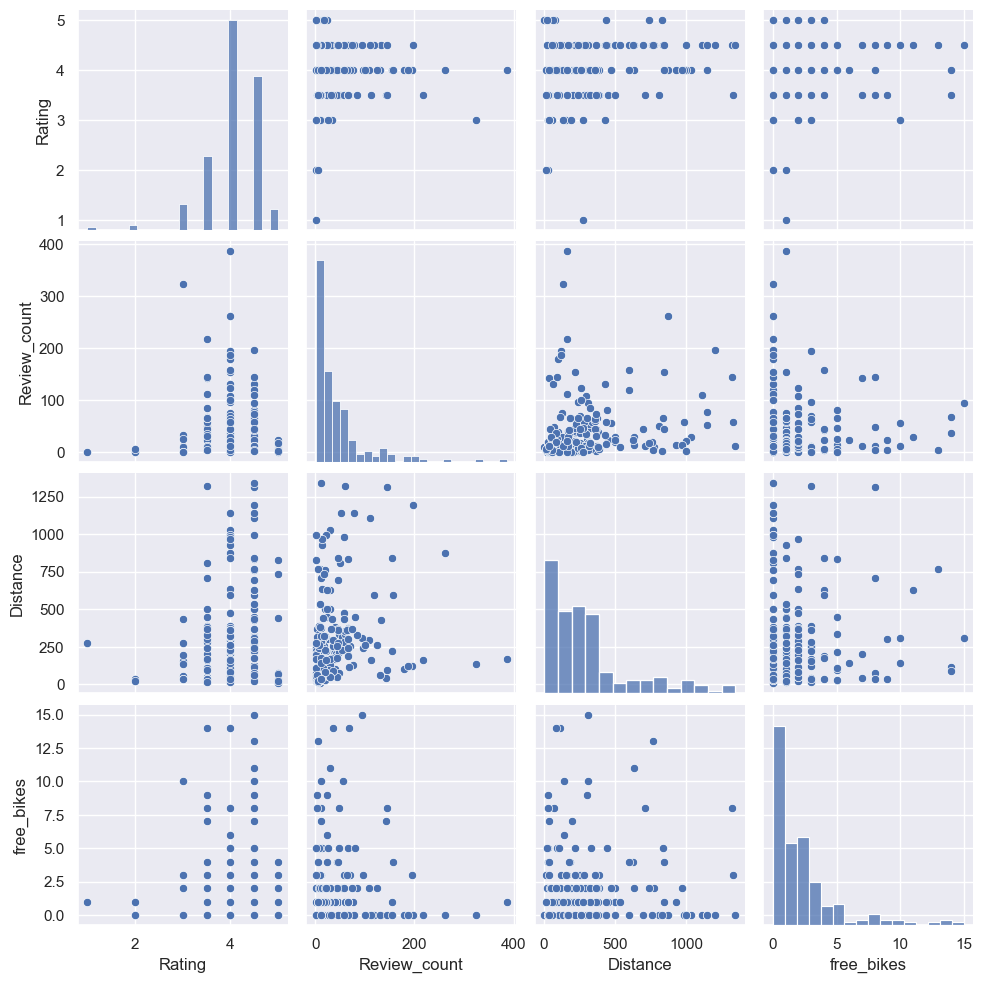

In [101]:
merged_data = pd.merge(df_yelp_revised[["Rating", "Review_count", "Distance"]],
                       df_bike_stations[["free_bikes"]],
                       left_index=True, right_index=True, how="inner")

sns.pairplot(merged_data)
plt.show()

There appears to be a correlation betwen free bikes and distance (from bike station) variables, as well as the free bikes and review count variable. 
I will further investigate these variables.

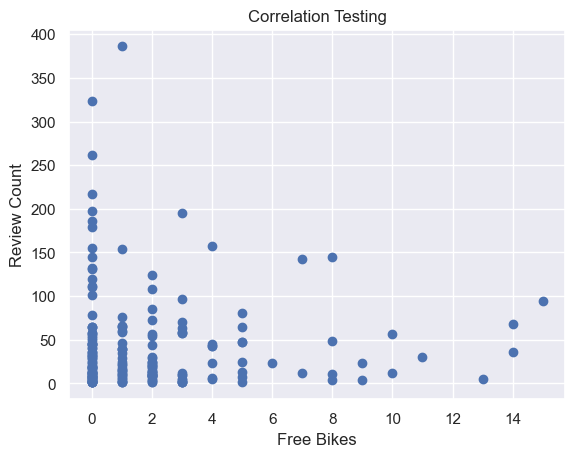

In [102]:
#Variables for our further analysis
free_bikes = merged_data["free_bikes"]
distance = merged_data["Distance"]
review_count = merged_data["Review_count"]

plt.scatter(free_bikes, review_count)
plt.xlabel("Free Bikes")
plt.ylabel("Review Count")
plt.title("Correlation Testing")
plt.savefig("../images/correlation_test1.png")

plt.show()


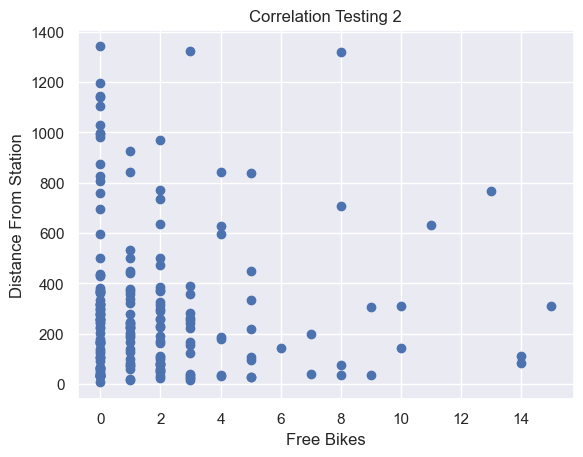

In [103]:
plt.scatter(free_bikes, distance)
plt.xlabel("Free Bikes")
plt.ylabel("Distance From Station")
plt.title("Correlation Testing 2")
plt.savefig("../images/correlation_test_2.png")

plt.show()

#### Further Analysis

I chose Distance, review count as variables to assess against free bikes because I felt that they could give us insight on user experience/behavior. 
Some factors to consider about the dataset:
- The number of available bikes is very low on average (1.9)
- The most common rating given by patrons to the various restaurants in our data is 4.0
- the spread of ratings given is evenly distributed at every distance (relative to Bike Stations)
- In the instances where bike availabilty was at or below the average (1.9), rating count was exceptionally high.
- In the instances where bike availability was at or below the average (1.9), distance of restaurants in relation to bike stations, is heavily concentrated within 500m, but increased substantially the less bikes were available.

#### Hypothesis

I believe that a more active user base leads to more restaurant patrons which in turn leads to more engagement with the yelp platform, which is represented in the review count. I believe that there is a negative correlation between review count and bike availability, which is further supported by the distance of restaurants where reviews are being made.


Provide model output and an interpretation of the results. 

In [104]:
x = merged_data[["Distance", "free_bikes"]]
y = merged_data["Review_count"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Review_count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.615
Date:                Fri, 17 Nov 2023   Prob (F-statistic):             0.0759
Time:                        14:03:26   Log-Likelihood:                -1013.4
No. Observations:                 186   AIC:                             2033.
Df Residuals:                     183   BIC:                             2042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8210      6.715      5.334      0.000      22.572      49.070
Distance       0.0307      0.014      2.207      0.029       0.003       0.058
free_bikes    -0.7582      1.444     -0.525      0.600      -3.608       2.091
==============================================================================
Omnibus:                      139.595   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1210.005
Skew:                           2.886   Prob(JB):                    1.78e-263
Kurtosis:                      14.082   Cond. No.                         701.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the analysis of the regression model, it looks like that the r-squared of 0.28 is very low. The adj r-squared explains a small portion (2.8%) of the variability in the dependent variable. It suggests that there may be other factors influencing the dependent variable that are besides our independant variables (Distance & free bikes). 
The however, the p-value for distance is 0.029 which suggests that that the varible may be statistically significant for predicting the review count, however, the p-value for free bikes says otherwise. 

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


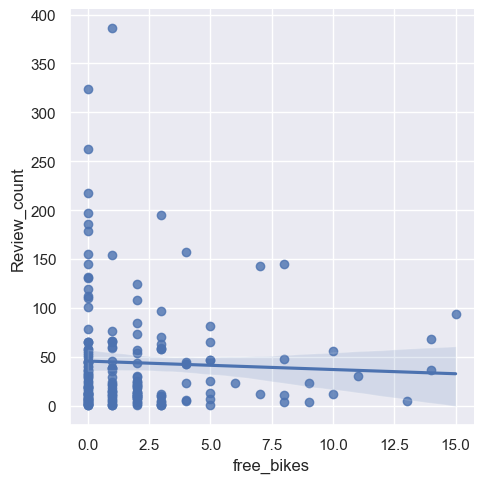

In [105]:
sns.lmplot(x="free_bikes", y="Review_count", data=merged_data)
plt.savefig("../images/regression_fb_rc.png")

plt.show()

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


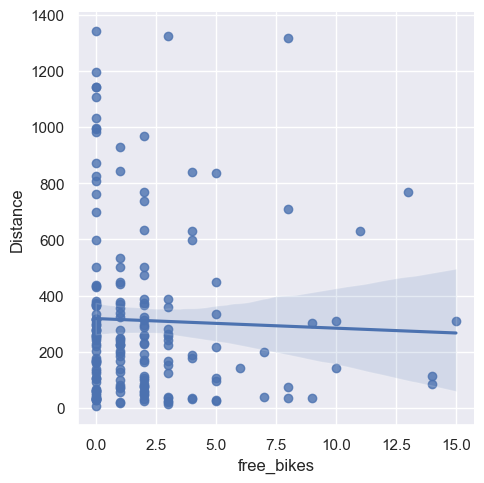

In [106]:
sns.lmplot(x="free_bikes", y="Distance", data=merged_data)
plt.savefig("../images/regression_fb_distance.png")

plt.show()

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


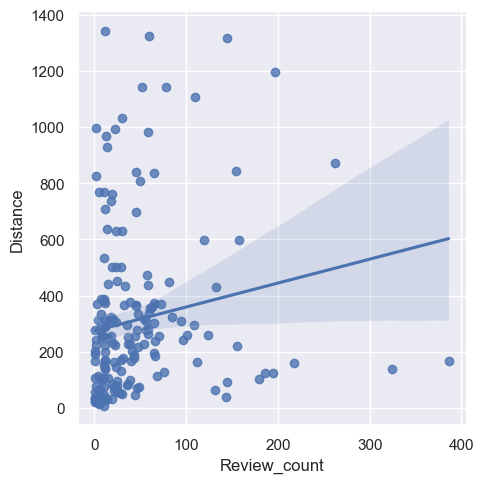

In [107]:
sns.lmplot(x="Review_count", y="Distance", data=merged_data)
plt.savefig("../images/regression_RC_distance.png")

plt.show()

With the new visualizations, it is not cleear if there is a correlation in between the number of free bikes, review count and distnace from bike stations.

In [108]:
x = merged_data[["Distance", "free_bikes", "Rating"]]
y = merged_data["Review_count"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Review_count   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.885
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.134
Time:                        14:03:33   Log-Likelihood:                -1013.2
No. Observations:                 186   AIC:                             2034.
Df Residuals:                     182   BIC:                             2047.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.8015     30.853      1.809      0.072      -5.074     116.677
Distance       0.0325      0.014      2.291      0.023       0.005       0.061
free_bikes    -0.7036      1.449     -0.486      0.628      -3.562       2.155
Rating        -5.1224      7.719     -0.664      0.508     -20.354      10.109
==============================================================================
Omnibus:                      137.833   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1169.366
Skew:                           2.845   Prob(JB):                    1.19e-254
Kurtosis:                      13.886   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In my attempt to better fit the model I added the rating variable as an independant variable. The r-squared value increased to 0.030; an increase of 2 percent (3%). While the increase is good, it may prove to be insignificant to the model. The p-values are all greater than 0.005 indicating that none of them are statistically significant. 

In [112]:
x = merged_data[["Distance"]]
y = merged_data["Review_count"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Review_count   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.975
Date:                Fri, 17 Nov 2023   Prob (F-statistic):             0.0269
Time:                        14:17:32   Log-Likelihood:                -1013.5
No. Observations:                 186   AIC:                             2031.
Df Residuals:                     184   BIC:                             2037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2379      5.988      5.718      0.000      22.423      46.052
Distance       0.0309      0.014      2.230      0.027       0.004       0.058
==============================================================================
Omnibus:                      140.801   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1242.136
Skew:                           2.912   Prob(JB):                    1.88e-270
Kurtosis:                      14.241   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stretch

How can you turn the regression model into a classification model?